In [2]:
import glob
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
from natsort import natsorted, ns
import matplotlib.pyplot as plt

In [3]:
# create function
# 2: 1cell for one comparision 
# 3. d2gi/d2go (opls4)
#   d3gi/d3go (opls4) <------------
#   d3gi/d3go (opls3e)  

# d3gi_prm (6 simulations)
# /home/khlee/work/desmond/output/drd3/prm7/drd3_prm7.f*/
# d3gi_pd (6 simulations)
# /home/khlee/work/desmond/output/drd3/pd2/drd3_pd2.f*/
# d3go_prm (6 simulations)
# /home/khlee/work/desmond/output/drd3ao/prm3/drd3ao_prm3.f*/
# d3go_pd (6 simulations)
# /home/khlee/work/desmond/output/drd3ao/pd2/drd3_pd2.f*/


# after 300ns
# (1 row is a plot)
# bro: d2gi/d2go
# prm: d3gi/d3go (opls3e)
# prm: d3gi/d3go (opls4)
# pd: d3gi/d3go (opls3e)
# pd: d3gi/d3go (opls4)



In [29]:
def read_data(receptor, ligand, time_limit=0, Verbose=False):
    data = {"Interface":[], "System":[], "Simulation":[], "Time":[], "Frame":[]}
    _filein = glob.glob("/home/khlee/work/desmond/output/"+receptor+"/"+ligand+"/*/")
    _filein = natsorted(_filein, key=lambda y: y.lower())
    if Verbose:
        print(_filein)
    for i in range(len(_filein)):
        t=np.loadtxt(_filein[i]+'/ene/time.dat')
        frame=list(range(1,len(t)+1))
        obs=pickle.load(open(_filein[i]+'/output/gpcr_interface.p',"rb"))
        try:
            assert (len(t)==len(obs))
            temp = pd.DataFrame({"obs":obs, "t":t, "frame":frame})
            
            sel = list(temp[temp["t"]>=time_limit]["obs"])
            sel_t = list(temp[temp["t"]>=time_limit]["t"])
            sel_frame = list(temp[temp["t"]>=time_limit]["frame"])
            
            data["Interface"] += sel
            data["System"]+=[receptor for a in range(len(sel))]
            data["Simulation"]+=[_filein[i].split("/")[-2].split("_")[-1] for a in range(len(sel))]
            data["Time"]+=sel_t
            data["Frame"]+=sel_frame
        except:
            continue
    
    return pd.DataFrame(data)
    

def read_data2(receptor, ligand, time_limit=0, Verbose=False):
    data = {"Interface":[], "System":[], "Simulation":[], "Time":[], "Frame":[]}
    _filein = glob.glob("/home/khlee/work/desmond/output/"+receptor+"/"+ligand+"/*.f*/")
    _filein = natsorted(_filein, key=lambda y: y.lower())
    if Verbose:
        print(_filein)
    for i in range(len(_filein)):
        t=np.loadtxt(_filein[i]+'/ene/time.dat')
        frame=list(range(1,len(t)+1))
        obs=pickle.load(open(_filein[i]+'/output/gpcr_interface.p',"rb"))
        try:
            assert (len(t)==len(obs))
            temp = pd.DataFrame({"obs":obs, "t":t, "frame":frame})
            
            sel = list(temp[temp["t"]>=time_limit]["obs"])
            sel_t = list(temp[temp["t"]>=time_limit]["t"])
            sel_frame = list(temp[temp["t"]>=time_limit]["frame"])
            
            data["Interface"] += sel
            data["System"]+=[receptor for a in range(len(sel))]
            data["Simulation"]+=[_filein[i].split("/")[-2].split("_")[-1] for a in range(len(sel))]
            data["Time"]+=sel_t
            data["Frame"]+=sel_frame
        except:
            continue
    
    return pd.DataFrame(data)

def gen_random_picks(control_seed=2020, num_splits=50, max_value=10000, Verbose = False):
    random_splits = []
    np.random.seed(control_seed)

    for a in range(0,num_splits):
        new_random = np.random.randint(0,max_value)
        #while (new_random in random_splits_old) or (new_random in random_splits):
        while (new_random in random_splits):
            #ensure no duplicate 
            new_random = np.random.randint(0,max_value)
        random_splits.append(new_random)

    #random_splits
    if Verbose:
        for random_split in random_splits:
            print(random_split)
    return random_splits

def bootstrap(df1, df2, splits=1, n=1000, seed=2020):
    sel = pd.DataFrame()
    _splits = gen_random_picks(seed, num_splits=splits)
    for i in range(splits):
        r = gen_random_picks(_splits[i], num_splits=n, max_value=len(df1))
        r2 = gen_random_picks(_splits[i], num_splits=n, max_value=len(df2))
        sel1 = df1.iloc[r]
        sel1["Split"] = [i+1 for j in range(len(sel1))]
        sel2 = df2.iloc[r2]
        sel2["Split"] = [i+1 for j in range(len(sel2))]
        sel = pd.concat([sel,sel1,sel2])
    plt = sns.catplot(x="Split", y="Interface",
                col="System", color='c',
                data=sel, kind="bar",
                height=4, aspect=1.2)
    

[9056, 7491, 2139, 1661, 3655, 4253, 8752, 9112, 1994, 5897]


/share/apps/python/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/share/apps/python/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


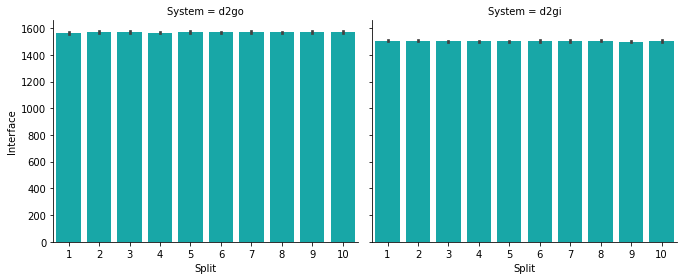

In [25]:
bootstrap(read_data("d2go", "bro"), read_data("d2gi", "bro"), 10)

/share/apps/python/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/share/apps/python/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


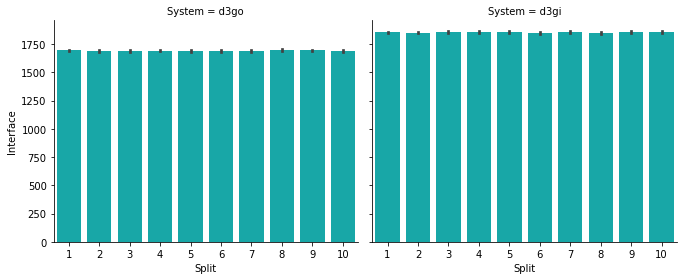

In [27]:
bootstrap(read_data("d3go", "pd"), read_data("d3gi", "pd"), 10)

/share/apps/python/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/share/apps/python/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


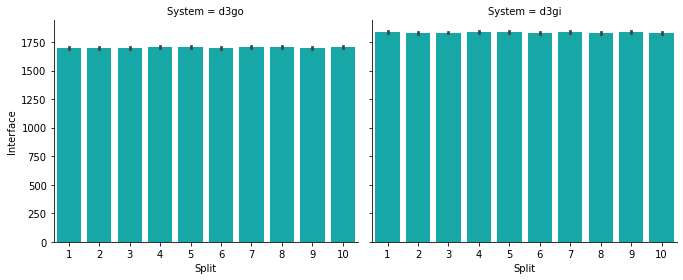

In [28]:
bootstrap(read_data("d3go", "prm"), read_data("d3gi", "prm"), 10)

In [31]:
bootstrap(read_data2("drd3ao", "prm3"), read_data2("drd3", "prm7"), 10)

OSError: /home/khlee/work/desmond/output/drd3/prm7/drd3_prm7.f2//ene/time.dat not found.

/share/apps/python/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/share/apps/python/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


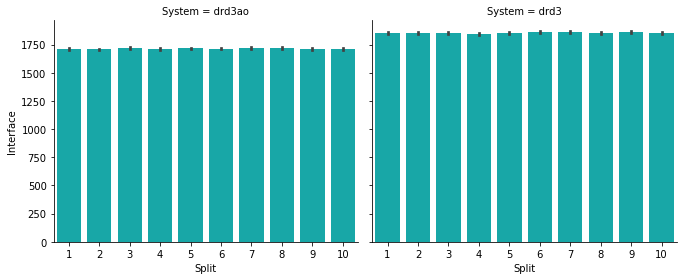

In [32]:
bootstrap(read_data2("drd3ao", "pd2"), read_data2("drd3", "pd2"), 10)